<a href="https://colab.research.google.com/github/Srinivasa01/Minor-Projects/blob/main/Welcome_To_Colaboratory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd

In [6]:
df=pd.read_csv('AAPL.csv')

In [8]:
df.head()

,Unnamed: 0,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,0,AAPL,2015-05-27 00:00:00+00:00,132.045,132.260,130.05,130.34,45833246,121.682558,121.880685,119.844118,120.111360,45833246,0.0,1.0
1,1,AAPL,2015-05-28 00:00:00+00:00,131.780,131.950,131.10,131.86,30733309,121.438354,121.595013,120.811718,121.512076,30733309,0.0,1.0
2,2,AAPL,2015-05-29 00:00:00+00:00,130.280,131.450,129.90,131.23,50884452,120.056069,121.134251,119.705890,120.931516,50884452,0.0,1.0
3,3,AAPL,2015-06-01 00:00:00+00:00,130.535,131.390,130.05,131.20,32112797,120.291057,121.078960,119.844118,120.903870,32112797,0.0,1.0
4,4,AAPL,2015-06-02 00:00:00+00:00,129.960,130.655,129.32,129.86,33667627,119.761181,120.401640,119.171406,119.669029,33667627,0.0,1.0


In [9]:
df1=df['close']

In [10]:
df1

0       132.045
1       131.780
2       130.280
3       130.535
4       129.960
         ...   
1253    314.960
1254    313.140
1255    319.230
1256    316.850
1257    318.890
Name: close, Length: 1258, dtype: float64

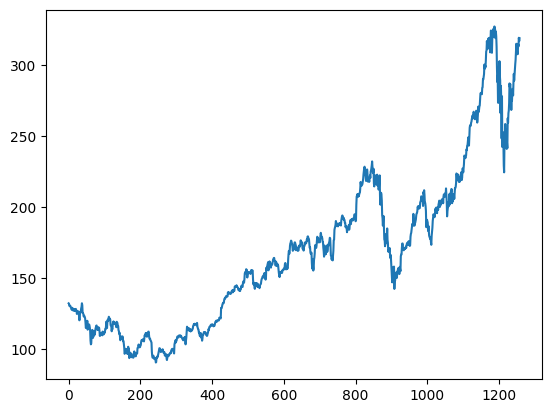

In [11]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [12]:
import numpy as np

In [13]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [14]:
df1

array([[0.17607447],
       [0.17495567],
       [0.16862282],
       ...,
       [0.96635143],
       [0.9563033 ],
       [0.96491598]])

In [16]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.70)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [17]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [18]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [19]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [20]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [21]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [22]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50851 (198.64 KB)
Trainable params: 50851 (198.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [23]:

model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
13/13 [==============================] - 9s 254ms/step - loss: 0.0167 - val_loss: 0.0627
Epoch 2/100
13/13 [==============================] - 2s 158ms/step - loss: 0.0029 - val_loss: 0.0090
Epoch 3/100
13/13 [==============================] - 2s 177ms/step - loss: 0.0011 - val_loss: 0.0050
Epoch 4/100
13/13 [==============================] - 2s 138ms/step - loss: 8.5743e-04 - val_loss: 0.0061
Epoch 5/100
13/13 [==============================] - 2s 144ms/step - loss: 7.3145e-04 - val_loss: 0.0050
Epoch 6/100
13/13 [==============================] - 2s 150ms/step - loss: 7.6055e-04 - val_loss: 0.0061
Epoch 7/100
13/13 [==============================] - 2s 144ms/step - loss: 7.2752e-04 - val_loss: 0.0079
Epoch 8/100
13/13 [==============================] - 2s 146ms/step - loss: 7.3666e-04 - val_loss: 0.0065
Epoch 9/100
13/13 [==============================] - 2s 169ms/step - loss: 6.8963e-04 - val_loss: 0.0067
Epoch 10/100
13/13 [==============================] - 2s 144ms/step

In [24]:
import tensorflow as tf


In [25]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

9/9 [==============================] - 0s 26ms/step


In [26]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [29]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np

# Define a threshold to classify as 0 or 1
threshold = 0.5

# Convert target variables to binary
y_train_binary = (y_train > threshold).astype(int)
y_test_binary = (ytest > threshold).astype(int)

# Make predictions on training set
train_predictions = model.predict(X_train)
train_predictions_binary = (train_predictions > threshold).astype(int)

# Make predictions on validation set
val_predictions = model.predict(X_test)
val_predictions_binary = (val_predictions > threshold).astype(int)

# Calculate classification metrics for training set
train_accuracy = accuracy_score(y_train_binary, train_predictions_binary)
train_precision = precision_score(y_train_binary, train_predictions_binary)
train_recall = recall_score(y_train_binary, train_predictions_binary)
train_f1 = f1_score(y_train_binary, train_predictions_binary)

# Calculate classification metrics for validation set
val_accuracy = accuracy_score(y_test_binary, val_predictions_binary)
val_precision = precision_score(y_test_binary, val_predictions_binary)
val_recall = recall_score(y_test_binary, val_predictions_binary)
val_f1 = f1_score(y_test_binary, val_predictions_binary)

# Print the classification metrics
print("Training Accuracy:", train_accuracy)
print("Training Precision:", train_precision)
print("Training Recall:", train_recall)
print("Training F1-score:", train_f1)
print("\nValidation Accuracy:", val_accuracy)
print("Validation Precision:", val_precision)
print("Validation Recall:", val_recall)
print("Validation F1-score:", val_f1)


9/9 [==============================] - 0s 27ms/step
Training Accuracy: 0.9871630295250321
Training Precision: 0.9322033898305084
Training Recall: 0.9016393442622951
Training F1-score: 0.9166666666666666

Validation Accuracy: 0.9314079422382672
Validation Precision: 0.9781420765027322
Validation Recall: 0.9226804123711341
Validation F1-score: 0.9496021220159152


**Using Logistic Regression**

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np

# Assuming you have X_train, y_train, X_test, ytest

# Reshape or flatten the input data
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

# Define a threshold to classify continuous values into binary classes
threshold = 0.5

# Convert target variables to binary
y_train_binary = (y_train > threshold).astype(int)
y_test_binary = (ytest > threshold).astype(int)

# Define and train the logistic regression model
logistic_model = LogisticRegression()
logistic_model.fit(X_train_flat, y_train_binary)

# Make predictions on training set
train_predictions_binary = logistic_model.predict(X_train_flat)

# Make predictions on validation set
val_predictions_binary = logistic_model.predict(X_test_flat)

# Calculate classification metrics for training set
train_accuracy = accuracy_score(y_train_binary, train_predictions_binary)
train_precision = precision_score(y_train_binary, train_predictions_binary)
train_recall = recall_score(y_train_binary, train_predictions_binary)
train_f1 = f1_score(y_train_binary, train_predictions_binary)

# Calculate classification metrics for validation set
val_accuracy = accuracy_score(y_test_binary, val_predictions_binary)
val_precision = precision_score(y_test_binary, val_predictions_binary)
val_recall = recall_score(y_test_binary, val_predictions_binary)
val_f1 = f1_score(y_test_binary, val_predictions_binary)

# Print the classification metrics
print("Training Accuracy:", train_accuracy)
print("Training Precision:", train_precision)
print("Training Recall:", train_recall)
print("Training F1-score:", train_f1)
print("\nValidation Accuracy:", val_accuracy)
print("Validation Precision:", val_precision)
print("Validation Recall:", val_recall)
print("Validation F1-score:", val_f1)


Training Accuracy: 0.9743260590500642
Training Precision: 0.8360655737704918
Training Recall: 0.8360655737704918
Training F1-score: 0.8360655737704918

Validation Accuracy: 0.9205776173285198
Validation Precision: 0.9134615384615384
Validation Recall: 0.979381443298969
Validation F1-score: 0.9452736318407959


**Using KNN**

In [32]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np

# Assuming you have X_train, y_train, X_test, ytest

# Reshape or flatten the input data
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

# Define a threshold to classify continuous values into binary classes
threshold = 0.5

# Convert target variables to binary
y_train_binary = (y_train > threshold).astype(int)
y_test_binary = (ytest > threshold).astype(int)

# Define and train the KNN model
knn_model = KNeighborsClassifier()
knn_model.fit(X_train_flat, y_train_binary)

# Make predictions on training set
train_predictions_binary = knn_model.predict(X_train_flat)

# Make predictions on validation set
val_predictions_binary = knn_model.predict(X_test_flat)

# Calculate classification metrics for training set
train_accuracy = accuracy_score(y_train_binary, train_predictions_binary)
train_precision = precision_score(y_train_binary, train_predictions_binary)
train_recall = recall_score(y_train_binary, train_predictions_binary)
train_f1 = f1_score(y_train_binary, train_predictions_binary)

# Calculate classification metrics for validation set
val_accuracy = accuracy_score(y_test_binary, val_predictions_binary)
val_precision = precision_score(y_test_binary, val_predictions_binary)
val_recall = recall_score(y_test_binary, val_predictions_binary)
val_f1 = f1_score(y_test_binary, val_predictions_binary)

# Print the classification metrics
print("Training Accuracy:", train_accuracy)
print("Training Precision:", train_precision)
print("Training Recall:", train_recall)
print("Training F1-score:", train_f1)
print("\nValidation Accuracy:", val_accuracy)
print("Validation Precision:", val_precision)
print("Validation Recall:", val_recall)
print("Validation F1-score:", val_f1)


Training Accuracy: 0.9948652118100129
Training Precision: 0.9830508474576272
Training Recall: 0.9508196721311475
Training F1-score: 0.9666666666666667

Validation Accuracy: 0.4693140794223827
Validation Precision: 0.6821705426356589
Validation Recall: 0.4536082474226804
Validation F1-score: 0.544891640866873


**Using Decision Trees**

In [33]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np

# Assuming you have X_train, y_train, X_test, ytest

# Reshape or flatten the input data
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

# Define a threshold to classify continuous values into binary classes
threshold = 0.5

# Convert target variables to binary
y_train_binary = (y_train > threshold).astype(int)
y_test_binary = (ytest > threshold).astype(int)

# Define and train the decision tree model
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train_flat, y_train_binary)

# Make predictions on training set
train_predictions_binary = tree_model.predict(X_train_flat)

# Make predictions on validation set
val_predictions_binary = tree_model.predict(X_test_flat)

# Calculate classification metrics for training set
train_accuracy = accuracy_score(y_train_binary, train_predictions_binary)
train_precision = precision_score(y_train_binary, train_predictions_binary)
train_recall = recall_score(y_train_binary, train_predictions_binary)
train_f1 = f1_score(y_train_binary, train_predictions_binary)

# Calculate classification metrics for validation set
val_accuracy = accuracy_score(y_test_binary, val_predictions_binary)
val_precision = precision_score(y_test_binary, val_predictions_binary)
val_recall = recall_score(y_test_binary, val_predictions_binary)
val_f1 = f1_score(y_test_binary, val_predictions_binary)

# Print the classification metrics
print("Training Accuracy:", train_accuracy)
print("Training Precision:", train_precision)
print("Training Recall:", train_recall)
print("Training F1-score:", train_f1)
print("\nValidation Accuracy:", val_accuracy)
print("Validation Precision:", val_precision)
print("Validation Recall:", val_recall)
print("Validation F1-score:", val_f1)


Training Accuracy: 1.0
Training Precision: 1.0
Training Recall: 1.0
Training F1-score: 1.0

Validation Accuracy: 0.35379061371841153
Validation Precision: 0.7777777777777778
Validation Recall: 0.10824742268041238
Validation F1-score: 0.1900452488687783
